# Cars4U Project

OBJECTIVE:

1. Explore and visualize the data.
2. Build a linear regression model to predict the prices of used cars.
3. Generate a set of insights and recommendations that will help the business. 

DATA DICTIONARY:

1. S.No.: Serial number
2. Name: Name of the car including brand name and model
3. Location: The location in which the car is being sold or is available for purchase
4. Year: Manufactoring year of the car
5. Kilometers_driven: Total mileage driven in the car by the previous owner(s) in kilometers
6. Fuel_type: The type of fuel required by the car (petrol, diesel, electric, CNG, LPG)
7. Transmission: Type of transmission in the car (Automatic/Manual)
8. Owner_type: Type of ownership
9. Mileage: The standard mileage offered by the manufacturer in kmpl or km/kg
10. Engine: The displacement volume of the engine in CC
11. Power: Maximum power of the engine in bhp
12. Seats: The number of seats in the car
13. New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh = 100,000)
14. Price: The price of the used car in INR Lakhs (1 Lakh = 100,000)

## Import necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
import warnings
warnings.filterwarnings('ignore')
sns.set(color_codes=True)
%matplotlib inline 
from scipy.stats import ttest_1samp, wilcoxon
from statsmodels.stats.power import ttest_power
from scipy.stats import ttest_ind
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

## Import the data set & view first five rows:

In [2]:
CARS1  = pd.read_csv('used_cars_data.csv', index_col='S.No.') 
CARS1.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


## View last five rows:

In [3]:
CARS1.tail()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,NaN
7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,NaN
7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,NaN,NaN
7252,Mercedes-Benz E-Class 2009-2013 E 220 CDI Avan...,Kochi,2014,72443,Diesel,Automatic,First,10.0 kmpl,2148 CC,170 bhp,5.0,NaN,NaN


## Check the shape of the data and the type: 

In [4]:
print(f'There are {CARS1.shape[0]} rows and {CARS1.shape[1]} columns.')

There are 7253 rows and 13 columns.


In [5]:
CARS1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


##  Check which columns have the most missing values:

In [6]:
CARS1.isnull().sum().sort_values(ascending=False) #By using "false", the first values displayed contain the greatest number of missing values

New_Price            6247
Price                1234
Seats                  53
Power                  46
Engine                 46
Mileage                 2
Owner_Type              0
Transmission            0
Fuel_Type               0
Kilometers_Driven       0
Year                    0
Location                0
Name                    0
dtype: int64

OBSERVATIONS:

1. There are 5 object columns: Name, location, fuel_type, transmission, & owner_type. We will convert these to categorical.
2. Mileage, Engine, Power are listed as an object, but we will convert them to a float to do some comparisons.
3. There are some missing values in mileage, engine, power, seats and price we will need to address.
4. New price is missing 86% of the data. We will remove that column due to that large gap of missing data.

## Drop the New Price column: 

In [7]:
CARS1.drop(["New_Price"],axis=1,inplace=True)

## Convert objects to categories: 

In [8]:
CARS1["Name"]=CARS1["Name"].astype("category")
CARS1["Location"]=CARS1["Location"].astype("category")
CARS1["Fuel_Type"]=CARS1["Fuel_Type"].astype("category")
CARS1["Transmission"]=CARS1["Transmission"].astype("category")
CARS1["Owner_Type"]=CARS1["Owner_Type"].astype("category")

## Check the dropped column & conversion to categorical data: 

In [9]:
CARS1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   category
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   object  
 8   Engine             7207 non-null   object  
 9   Power              7207 non-null   object  
 10  Seats              7200 non-null   float64 
 11  Price              6019 non-null   float64 
dtypes: category(5), float64(2), int64(2), object(3)
memory usage: 592.6+ KB


## Convert Mileage, Engine and Power to a float: 

In [10]:
#For Mileage:
new_mileage = CARS1['Mileage'].str.extract(r'(\d+(?:\.\d+))?') #capture the numbers
#\d+ tells it to capture one or more numbers & (?:\.\d+)? tells it to capture a dot followed by one or more numbers, if there are any
new_mileage.sample(n=10) #check conversion

,0
S.No.,
6300,17.68
986,15.73
1916,10.5
3532,15.6
2893,12.99
1089,13.24
747,17.2
4751,18.9
3024,15.1


In [11]:
CARS1['Mileage'] = new_mileage #write new df to old df
CARS1['Mileage'] = pd.to_numeric(CARS1['Mileage'], errors='coerce') #convert to numeric
CARS1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   category
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   object  
 9   Power              7207 non-null   object  
 10  Seats              7200 non-null   float64 
 11  Price              6019 non-null   float64 
dtypes: category(5), float64(3), int64(2), object(2)
memory usage: 592.6+ KB


In [12]:
#for Engine:
new_engine = CARS1['Engine'].str.extract(r'(\d+)?') #capture the numbers 
#\d+ tells it to capture one or more numbers 
new_engine.head #check conversion

<bound method NDFrame.head of           0
S.No.      
0       998
1      1582
2      1199
3      1248
4      1968
...     ...
7248   1598
7249   1197
7250   1461
7251   1197
7252   2148

[7253 rows x 1 columns]>

In [13]:
CARS1['Engine'] = new_engine #write new df to old df
CARS1['Engine'] = pd.to_numeric(CARS1['Engine'], errors='coerce') #convert to numeric
CARS1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   category
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7207 non-null   object  
 10  Seats              7200 non-null   float64 
 11  Price              6019 non-null   float64 
dtypes: category(5), float64(4), int64(2), object(1)
memory usage: 592.6+ KB


In [14]:
#For Power:
new_power = CARS1['Power'].str.extract(r'(\d+)?') #capture the numbers 
#\d+ tells it to capture one or more numbers 
new_power.head #check conversion

<bound method NDFrame.head of          0
S.No.     
0       58
1      126
2       88
3       88
4      140
...    ...
7248   103
7249   103
7250    63
7251   103
7252   170

[7253 rows x 1 columns]>

In [15]:
CARS1['Power'] = new_power #write new df to old df
CARS1['Power'] = pd.to_numeric(CARS1['Power'], errors='coerce') #convert to numeric
CARS1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Name               7253 non-null   category
 1   Location           7253 non-null   category
 2   Year               7253 non-null   int64   
 3   Kilometers_Driven  7253 non-null   int64   
 4   Fuel_Type          7253 non-null   category
 5   Transmission       7253 non-null   category
 6   Owner_Type         7253 non-null   category
 7   Mileage            7251 non-null   float64 
 8   Engine             7207 non-null   float64 
 9   Power              7078 non-null   float64 
 10  Seats              7200 non-null   float64 
 11  Price              6019 non-null   float64 
dtypes: category(5), float64(5), int64(2)
memory usage: 592.6 KB


### Perform statistical summary for the data: 

In [16]:
CARS1.describe().T #Summary for reference

,count,mean,std,min,25%,50%,75%,max
Year,7253.0,2013.365366,3.254421,1996.00,2011.00,2014.00,2016.00,2019.00
Kilometers_Driven,7253.0,58699.063146,84427.720583,171.00,34000.00,53416.00,73000.00,6500000.00
Mileage,7251.0,18.141580,4.562197,0.00,15.17,18.16,21.10,33.54
Engine,7207.0,1616.573470,595.285137,72.00,1198.00,1493.00,1968.00,5998.00
Power,7078.0,112.448714,53.534115,34.00,75.00,94.00,138.00,616.00
Seats,7200.0,5.279722,0.811660,0.00,5.00,5.00,5.00,10.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.95,160.00


OBSERVATIONS:
1. The mean is greater than the median in the following columns: Kilometers driven, Engine, Power and Price.
2. Kilometers driven is highly skewed (extreme values ie. 650,0000.00). Recommend some type of normalization/scaling.
3. Mileage has "0" as a minimum value as well as seats. Missing values should be addressed for these columns.

In [17]:
CARS1.describe(include = ['category']).T #Summary for reference

,count,unique,top,freq
Name,7253,2041,Mahindra XUV500 W8 2WD,55
Location,7253,11,Mumbai,949
Fuel_Type,7253,5,Diesel,3852
Transmission,7253,2,Manual,5204
Owner_Type,7253,4,First,5952


OBSERVATIONS:
1. Name column has 2041 unique inputs with the most commen occuring 55 times. Explore possibly sorting/grouping by brand name.
2. The remaining columns have fewer unique inputs thus minimizing the need for sorting/grouping.

# EDA

## Univariate analysis 

## Categorical data 

In [18]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) 
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) 
        x = p.get_x() + p.get_width() / 2 - 0.05 
        y = p.get_y() + p.get_height()           
        ax.annotate(percentage, (x, y), size = 12) 

### Observations on location: 

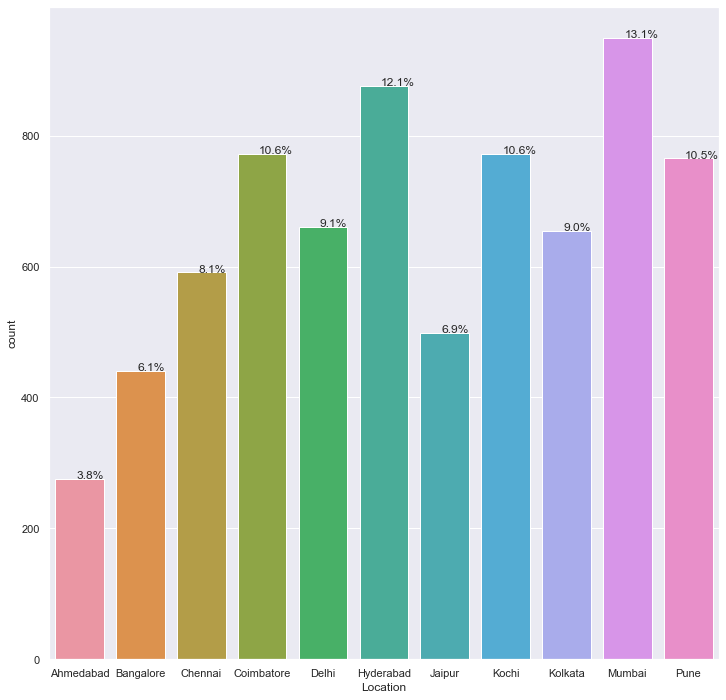

In [19]:
plt.figure(figsize=(12,12))
ax = sns.countplot(CARS1['Location'])
plt.xlabel('Location')
plt.ylabel('count')
bar_perc(ax,CARS1['Location']) 

OBSERVATIONS:
1. There appears to have a normal distribution of cars throughout India. 
2. The greatest numbers appear in: Mumbai, Hyderabad location, Coimbatore & Kochi and Pune.
3. Ahmedabad has the fewest number of used cars.

### Observations on fuel type: 

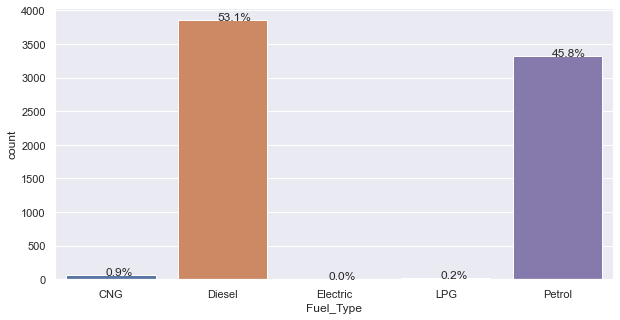

In [20]:
plt.figure(figsize=(10,5))
ax = sns.countplot(CARS1['Fuel_Type'])
plt.xlabel('Fuel_Type')
plt.ylabel('count')
bar_perc(ax,CARS1['Fuel_Type']) 

OBSERVATIONS:
1. Diesel fuel is the greatest proportion of the fuel types with 53.1%.
2. Petrol fuel is a strong second place with 45.8%. 

### Observations on transmission: 

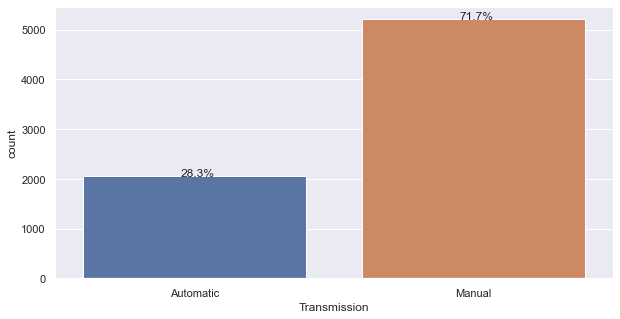

In [21]:
plt.figure(figsize=(10,5))
ax = sns.countplot(CARS1['Transmission'])
plt.xlabel('Transmission')
plt.ylabel('count')
bar_perc(ax,CARS1['Transmission']) 

OBSERVATIONS:
1. Manual transmission is the highest proportion of the used cars surveyed with 71.7%.

### Observations on owner type:

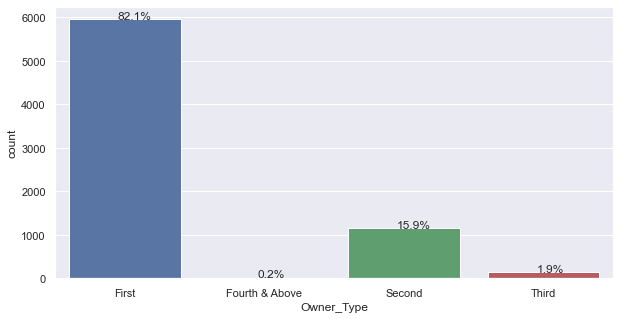

In [22]:
plt.figure(figsize=(10,5))
ax = sns.countplot(CARS1['Owner_Type'])
plt.xlabel('Owner_Type')
plt.ylabel('count')
bar_perc(ax,CARS1['Owner_Type']) 

OBSERVATIONS:
1. 82.1% of the cars have only had one owner.
2. Only 15.9% of the cars have had 2 car owners previously.

## Numerical data 

### Observations on year: 

In [23]:
def histogram_boxplot(feature, figsize=(15,10), bins = None):
    """ Boxplot and histogram combined
    feature: 1-d feature array
    figsize: size of fig (default (9,8))
    bins: number of bins (default None / auto)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.25, .75)}, 
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, showmeans=True, color='violet') # boxplot will be created and a star will indicate the mean value of the column
    sns.distplot(feature, kde=F, ax=ax_hist2, bins=bins,palette="winter") if bins else sns.distplot(feature, kde=False, ax=ax_hist2) # For histogram
    ax_hist2.axvline(np.mean(feature), color='green', linestyle='--') # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='black', linestyle='-') # Add median to the histogram

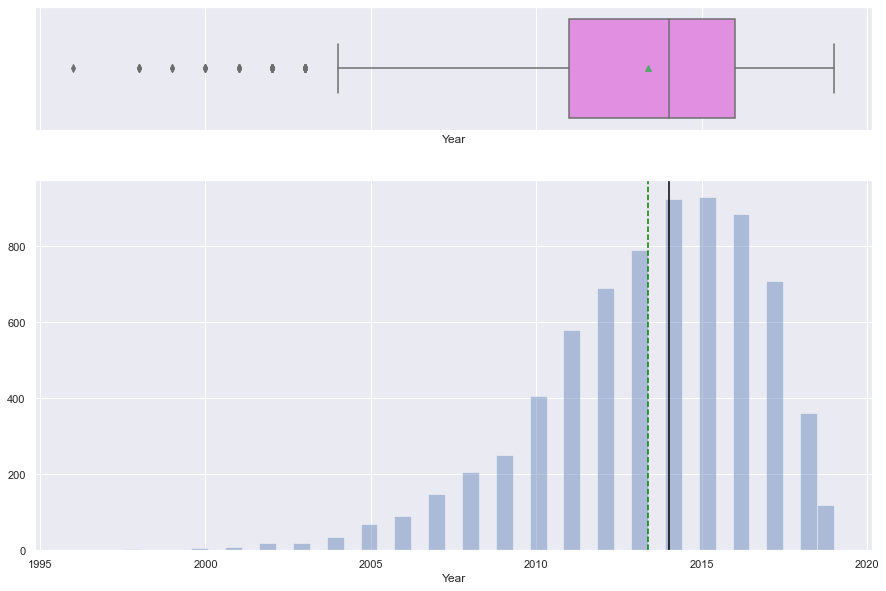

In [24]:
histogram_boxplot(CARS1["Year"])

OBSERVATIONS:
1. The mean year for the used cars is around 2013.
2. The median year for the used cars is around 2014. 
3. There are some outliers in the older car range. 

### Observations on kilometers driven: 

<AxesSubplot:xlabel='Kilometers_Driven'>

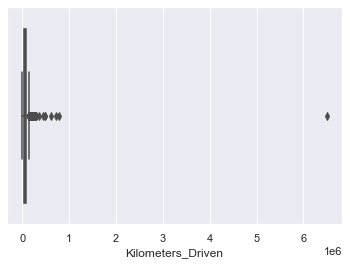

In [25]:
sns.boxplot(CARS1['Kilometers_Driven'])

OBSERVATION: 
1. The data is highly skewed. I will check for unique values during preprocessing. Based on what I find, I will address those then. 

### Observations on seats:

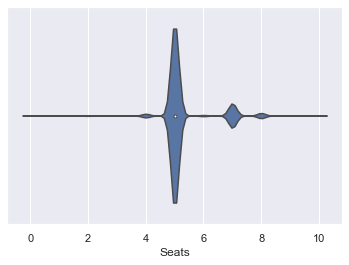

In [26]:
sns.violinplot(CARS1["Seats"]);

OBSERVATIONS:
1. Majority of the used cars have 5 seats.
2. There is also a small group that have 7 seats.
3. There are some missing values here which we may decide to adjust for by replacing them with the mean.

### Observations on price:

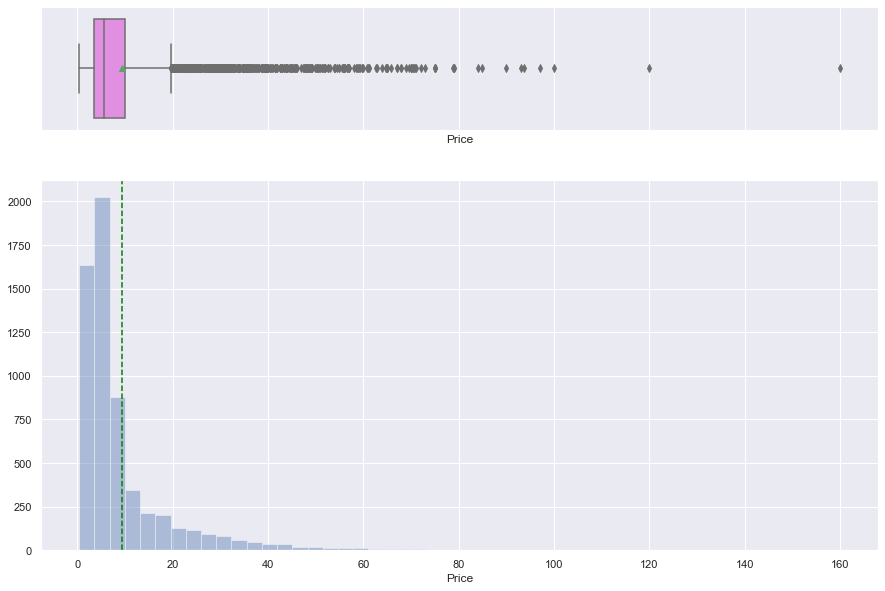

In [27]:
histogram_boxplot(CARS1["Price"])

OBSERVATIONS:
1. Significant outliers are present. Data could benefit possibly from log transformation during preprocessing.  

### Observations on mileage: 

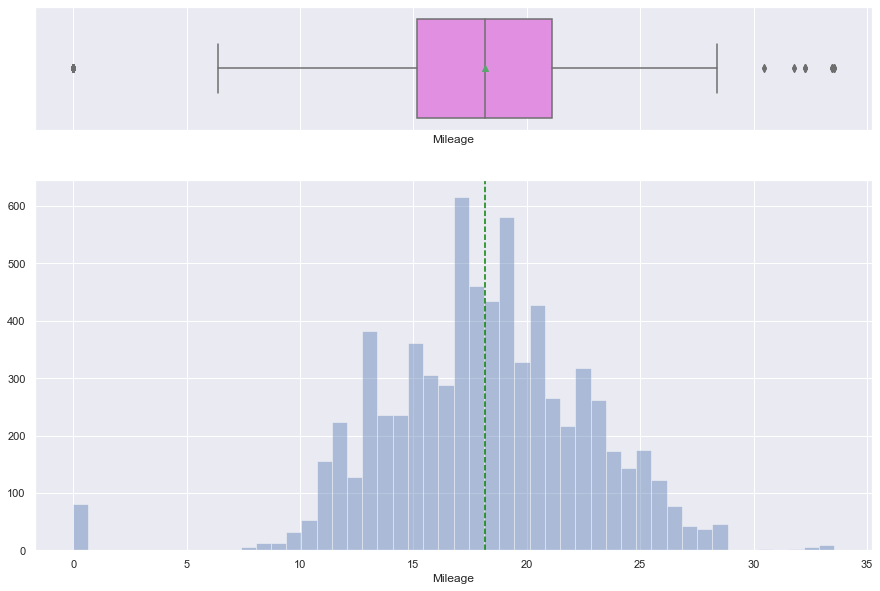

In [28]:
histogram_boxplot(CARS1["Mileage"])

OBSERVATIONS:
1. There are some outliers. Otherwise, the data appears to have a normal distribution. 

### Observations on engine: 

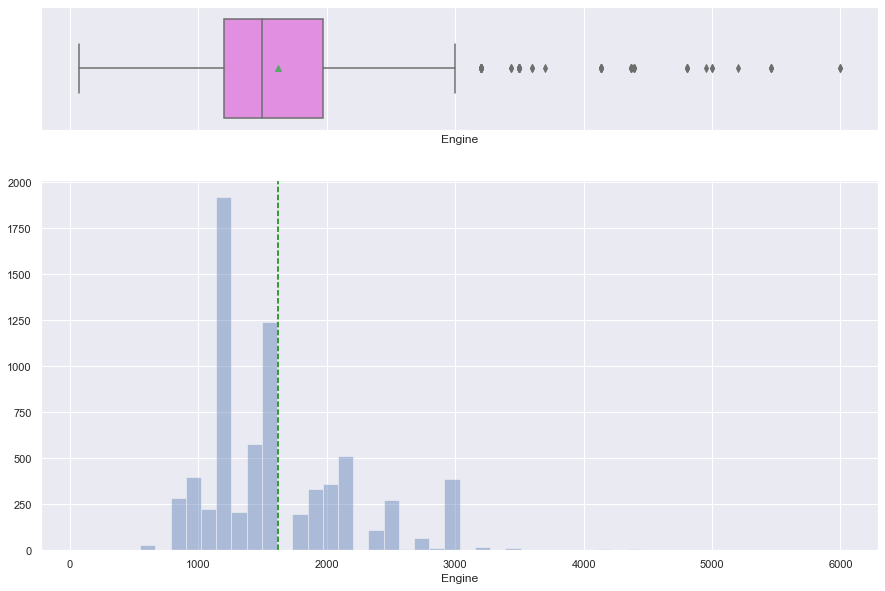

In [29]:
histogram_boxplot(CARS1["Engine"])

OBSERVATIONS:
1. There are outliers present. 
2. The mean appears to be slightly higher than the median suggesting right skewed data. 

### Observations on power: 

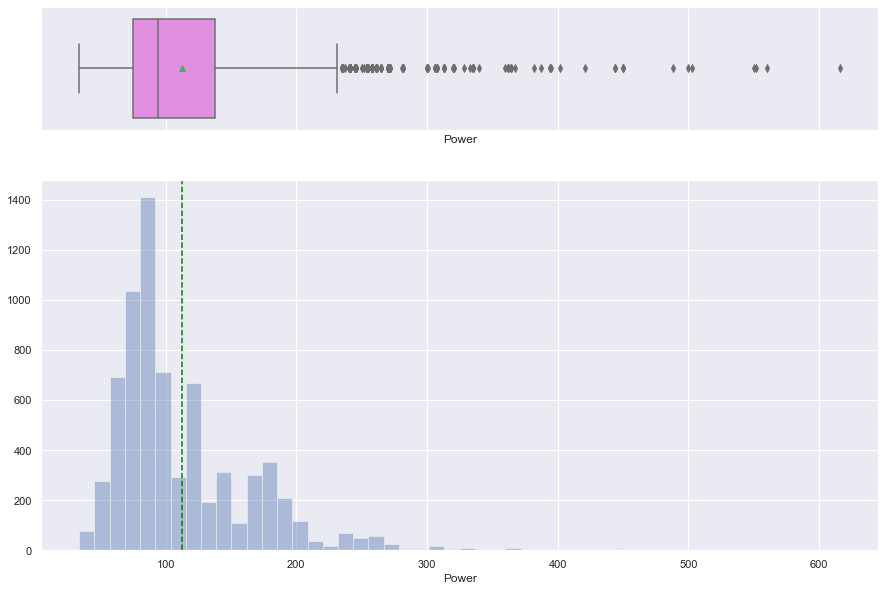

In [30]:
histogram_boxplot(CARS1["Power"])

OBSERVATIONS:
1. There appear to be significant outliers.
2. The mean appears to be slightly higher than the median suggesting right skewed data.

## Bivariate analysis: 

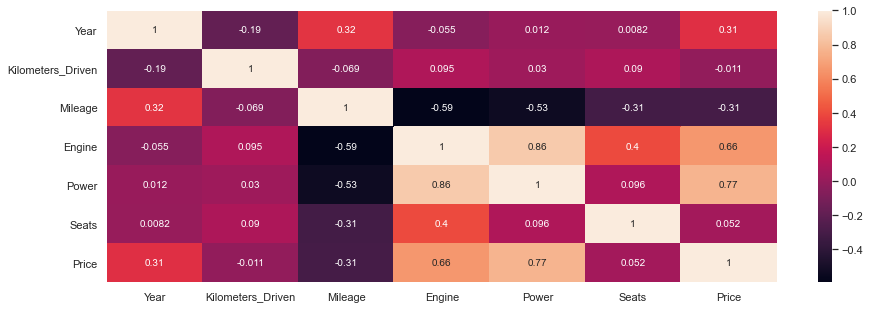

In [31]:
plt.figure(figsize=(15,5))
sns.heatmap(CARS1.corr(),annot=True)
plt.show()

OBSERVATIONS:
1. Strongest correlation is between power and engine (.86).
2. There is also a correlation between power and price (.77) and engine and price (.66).

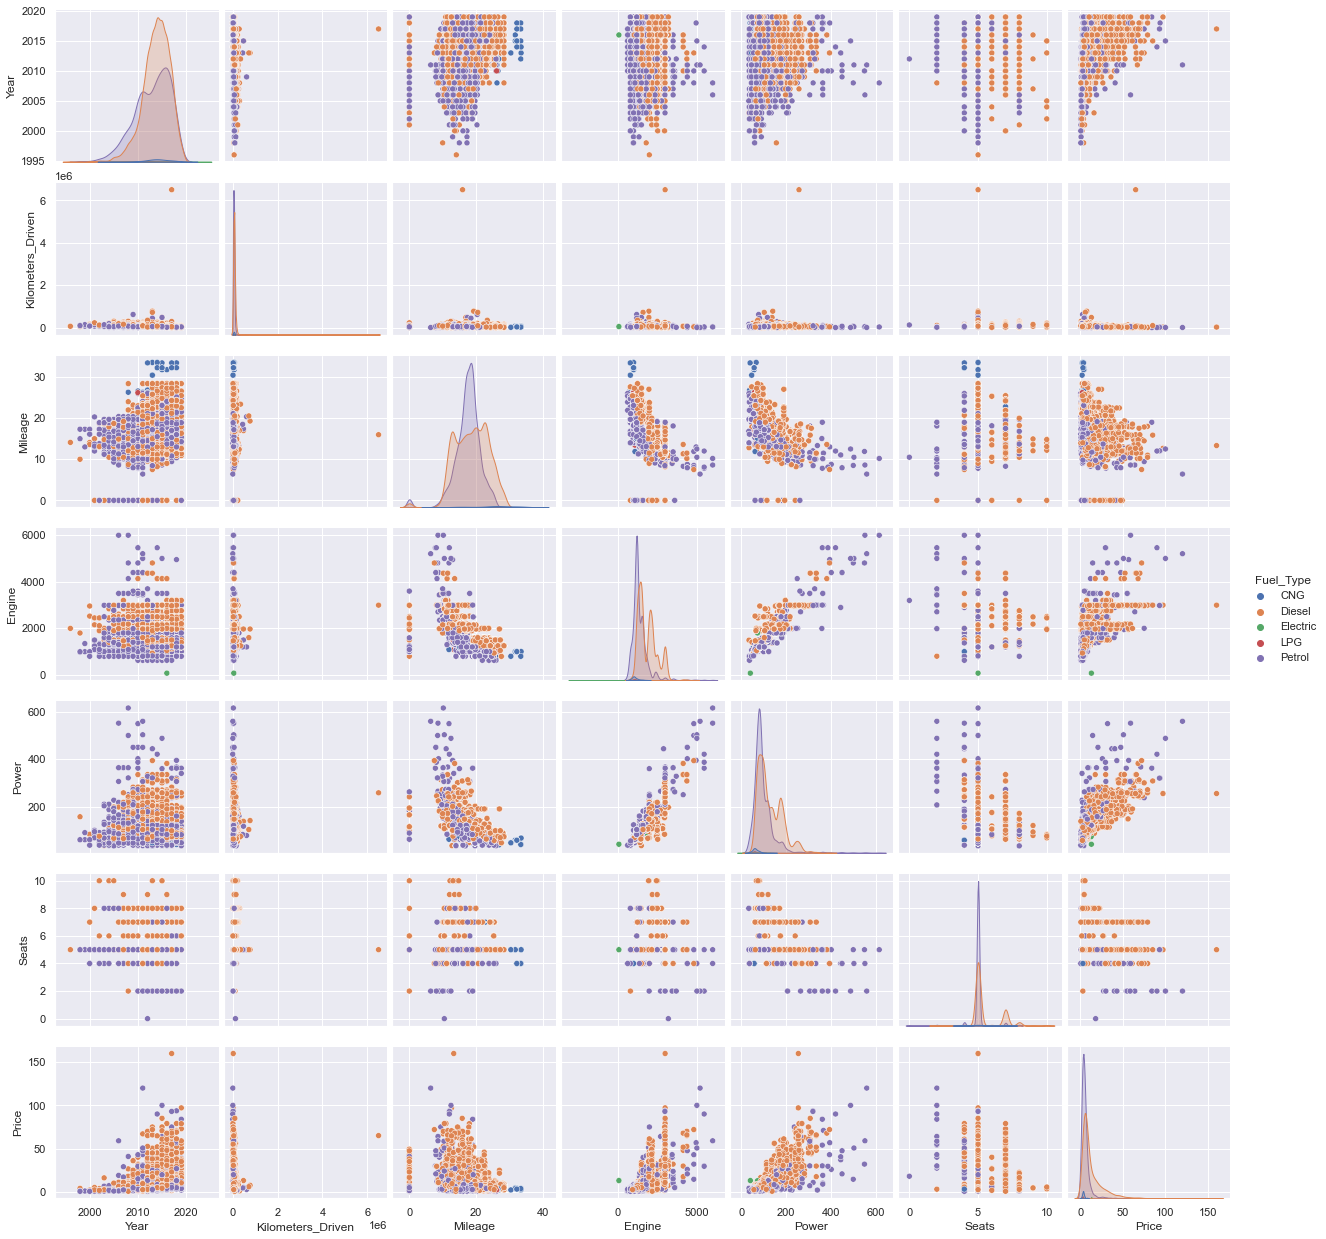

In [32]:
#sns.pairplot(data=CARS1.drop(['Location'],axis=True,hue="Price")
#plt.show()
sns.pairplot(CARS1, hue="Fuel_Type");

OBSERVATIONS:
1. Mileage has a negative correlation with engine displacement & power. As the power of the car increases, the more gas it consumes. 
2. Price has a positive relationship with the year the car was built. The newer the car, the higher the price.
3. I expected kilometers driven to have a relationship with the price but it clearly does not. 

### Relationship between price and power: 

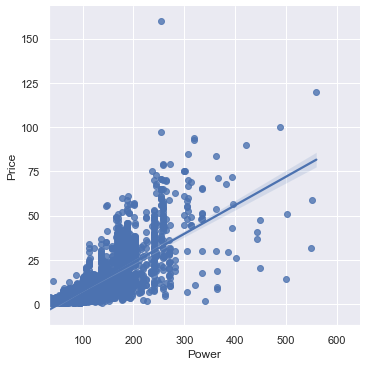

In [33]:
sns.lmplot(y="Price", x="Power", data=CARS1);

OBSERVATIONS:
1. As the power increases, the price increases.
2. There are some missing values that will need to be addressed.

### Relationship between price and engine: 

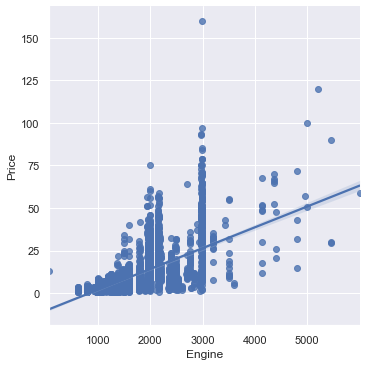

In [34]:
sns.lmplot(y="Price", x="Engine", data=CARS1);

OBSERVATIONS:
1. As the engine capacity increase, so does the price.

### Relationship between price and mileage: 

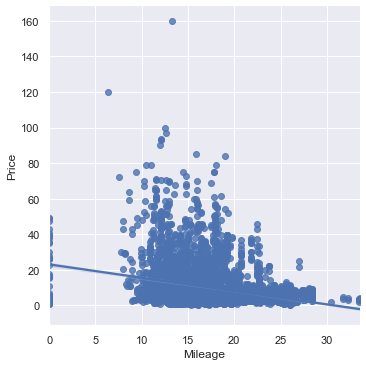

In [35]:
sns.lmplot(y="Price", x="Mileage", data=CARS1);

OBSERVATIONS:
1. The price deceases as the mileage increases.
2. There are some missing values that will need to be addressed. 

### Relationship between price and kilometers driven: 

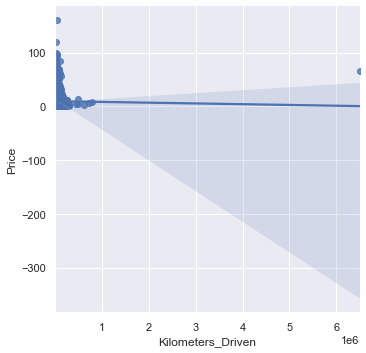

In [36]:
sns.lmplot(y="Price", x="Kilometers_Driven", data=CARS1);

OBSERVATIONS:
1. The is almost a flat regression line which would be an undefined correlation. It does appear to have a slight drop towards the end, which could indicate that as the kilometers increase the price decreases. This would not be a surprising phenomenon. 
2. Under the statistical summary,there was an extreme value listed for a 2017 car. This will need to be addressed in preprocessing. 

### Relationship between price and location:

Text(0, 0.5, 'Price')

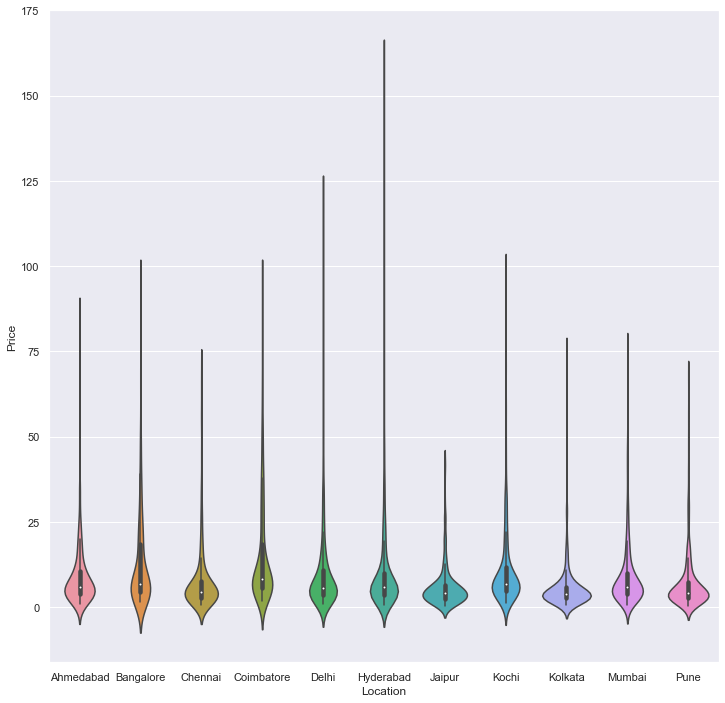

In [37]:
fig = plt.gcf()

# Change seaborn plot size
fig.set_size_inches(12, 12)

# Create the violin plot
sns.violinplot(y='Price', x='Location',
              data=CARS1)

# Change Axis labels:
plt.xlabel('Location')
plt.ylabel('Price')

OBSERVATIONS:
1. There appears to be similiar prices of used cars sold in each location. 
2. However, some locations clearly have some outliers and could potentially suggests there are oppurtunities in these locations for higher priced cars.

### Relationship between price and fuel type: 

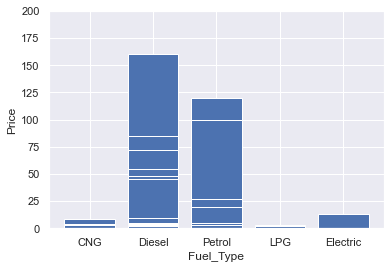

In [38]:
plt.bar(CARS1['Fuel_Type'], CARS1['Price'])
plt.ylabel('Price')
plt.xlabel('Fuel_Type')
plt.ylim(0,200)
plt.show()

OBSERVATIONS:
1. It appears that Diesel cars will cost up to 160 Lakhs and the Petrol ones can cost up to 124 Lakhs.

### Relationship between Price and  

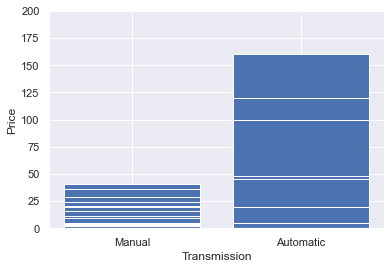

In [39]:
plt.bar(CARS1['Transmission'], CARS1['Price'])
plt.ylabel('Price')
plt.xlabel('Transmission')
plt.ylim(0,200)
plt.show()

OBSERVATIONS:
1. Manual cars will cost up to 160 Lakhs and the manual ones up to 40 Lakhs.

### Relationship between power and engine:

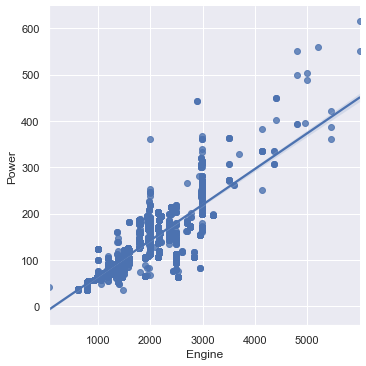

In [40]:
sns.lmplot(y="Power", x="Engine", data=CARS1);

OBSERVATIONS:
1. As the engine capacity increases, the power increases.

# Data Pre-processing

## Replace 0 values in mileage with mean value:  

In [41]:
CARS1['Mileage'].replace(0,CARS1['Mileage'].mean(axis=0),inplace=True)

In [42]:
CARS1["Mileage"].describe() #check for task completion

count    7251.000000
mean       18.344238
std         4.134674
min         6.400000
25%        15.400000
50%        18.160000
75%        21.100000
max        33.540000
Name: Mileage, dtype: float64

## Missing value treatment for Mileage, Seats, Engine, Power and Price:  

In [43]:
print(CARS1['Mileage'].isnull().sum())
CARS1['Mileage'].fillna(CARS1['Mileage'].mean(), inplace=True)  # mean imputation
CARS1['Mileage'].isnull().sum()

2


0

In [44]:
print(CARS1['Seats'].isnull().sum())
CARS1['Seats'].fillna(CARS1['Seats'].mean(), inplace=True)  # mean imputation
CARS1['Seats'].isnull().sum()

53


0

In [45]:
print(CARS1['Engine'].isnull().sum())
CARS1['Engine'].fillna(CARS1['Engine'].mean(), inplace=True)  # mean imputation
CARS1['Engine'].isnull().sum()

46


0

In [46]:
print(CARS1['Power'].isnull().sum())
CARS1['Power'].fillna(CARS1['Power'].mean(), inplace=True)  # mean imputation
CARS1['Power'].isnull().sum()

175


0

In [47]:
print(CARS1['Price'].isnull().sum())
CARS1.dropna(inplace=True)       #Dropping these rows due to the number of missing data. Since this is my 'y' variable, I don't want to skew the data by replacing with the mean.
CARS1['Price'].isnull().sum()

1234


0

## Check for and correct NaN:

In [48]:
CARS1.isnull().values.sum()

0

## Removing extreme values for price and kilometers driven: 

In [49]:
#Check summary for price column
CARS1['Price'].describe()

count    6019.000000
mean        9.479468
std        11.187917
min         0.440000
25%         3.500000
50%         5.640000
75%         9.950000
max       160.000000
Name: Price, dtype: float64

In [50]:
#Establish what are beyond 3 standard deviations from the IQR
quartiles = np.quantile(CARS1['Price'][CARS1['Price'].notnull()], [.25, .75])
price_3iqr = 3 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 3*IQR = {price_3iqr}')
outlier_price = CARS1.loc[np.abs(CARS1['Price'] - CARS1['Price'].median()) > price_3iqr, 'Price']
outlier_price

Q1 = 3.5, Q3 = 9.95, 3*IQR = 19.349999999999998


S.No.
13      27.00
19      28.00
38      28.00
62      26.70
67      35.67
        ...  
5927    45.52
5946    48.00
5970    26.76
5996    30.54
6008    45.00
Name: Price, Length: 514, dtype: float64

In [51]:
#Drop rows with extreme values
CARS1.drop(outlier_price.index, axis = 0, inplace=True)

In [52]:
#Check for treatment
CARS1['Price'].describe()

count    5505.000000
mean        6.689206
std         4.965096
min         0.440000
25%         3.300000
50%         5.250000
75%         8.120000
max        24.990000
Name: Price, dtype: float64

In [53]:
#Check summary for kilometers driven column
CARS1['Kilometers_Driven'].describe()

count      5505.000000
mean      59435.613261
std       38550.353897
min         171.000000
25%       35362.000000
50%       55000.000000
75%       75000.000000
max      775000.000000
Name: Kilometers_Driven, dtype: float64

In [54]:
quartiles = np.quantile(CARS1['Kilometers_Driven'][CARS1['Kilometers_Driven'].notnull()], [.25, .75])
km_3iqr = 3 * (quartiles[1] - quartiles[0])
print(f'Q1 = {quartiles[0]}, Q3 = {quartiles[1]}, 3*IQR = {km_3iqr}')
outlier_km = CARS1.loc[np.abs(CARS1['Kilometers_Driven'] - CARS1['Kilometers_Driven'].median()) > km_3iqr, 'Kilometers_Driven']
outlier_km

Q1 = 35362.0, Q3 = 75000.0, 3*IQR = 118914.0


S.No.
29      262000
64      178000
77      230000
181     216000
230     200000
340     775000
358     620000
482     179000
556     179000
576     202082
647     200000
792     205000
838     215000
1013    176000
1068    225000
1101    248000
1442    231673
1447    177000
1521    194000
1528    299322
1766    220000
1846    255000
1860    720000
1972    190000
1975    282000
2033    190000
2093    196000
2267    215750
2346    234000
2588    179032
2620    180000
2644    178280
2737    200000
2823    480000
2988    240000
3092    480000
3252    185200
3408    193000
3649    300000
3713    232000
3894    250000
4491    445000
4499    193254
4638    197000
4719    250000
4792    242000
4832    180000
4944    197000
5202    200000
5273    200000
5523    199000
5647    227000
5800    210000
5802    200000
5834    250000
5852    192000
5871    180000
5957    186679
Name: Kilometers_Driven, dtype: int64

In [55]:
#Drop rows with extreme values
CARS1.drop(outlier_km.index, axis = 0, inplace=True)

In [56]:
#Check summary for treatment
CARS1['Kilometers_Driven'].describe()

count      5447.000000
mean      57395.222875
std       30678.215413
min         171.000000
25%       35076.000000
50%       54957.000000
75%       74000.000000
max      173000.000000
Name: Kilometers_Driven, dtype: float64

## Treat outliers in numerical columns: 

## Sort Name column by Brand: 

In [57]:
CARS1['Name'] = CARS1['Name'].transform( lambda x: x.split()[0])

## Encoding the Name, Location, Fuel type, Transmission and Owner Type columns: 

In [58]:
CARS1=pd.get_dummies(CARS1,columns=['Name', 'Location', "Transmission", 'Fuel_Type', 'Owner_Type'], drop_first=True)

In [59]:
CARS1.head() #Check for encoding of categorical data

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Name_Audi,Name_BMW,Name_Chevrolet,...,Location_Mumbai,Location_Pune,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,,
0,2010,72000,26.60,998.0,58.0,5.0,1.75,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,2015,41000,19.67,1582.0,126.0,5.0,12.50,0,0,0,...,0,1,1,1,0,0,0,0,0,0
2,2011,46000,18.20,1199.0,88.0,5.0,4.50,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,2012,87000,20.77,1248.0,88.0,7.0,6.00,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,2013,40670,15.20,1968.0,140.0,5.0,17.74,1,0,0,...,0,0,0,1,0,0,0,0,1,0


## Scaling treatment of kilometers driven and price: 

In [60]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

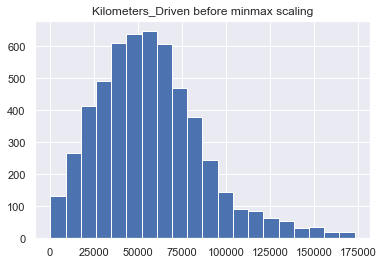

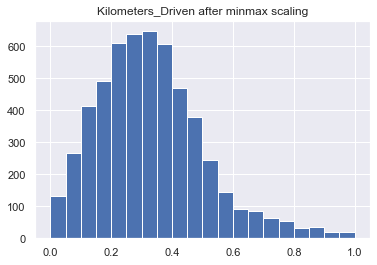

In [61]:
CARS1['Kilometers_Driven'].hist(bins=20) # Shows the histogram prior to scaling for reference.
plt.title('Kilometers_Driven before minmax scaling')
plt.show()

scaler = MinMaxScaler()
CARS1['Kilometers_Driven'] = scaler.fit_transform(CARS1[['Kilometers_Driven']]) # Applies the scaling directly to the column.

CARS1['Kilometers_Driven'].hist(bins=20) #Shows the histogram after scaling.
plt.title('Kilometers_Driven after minmax scaling')
plt.show()

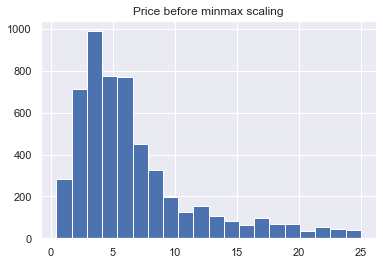

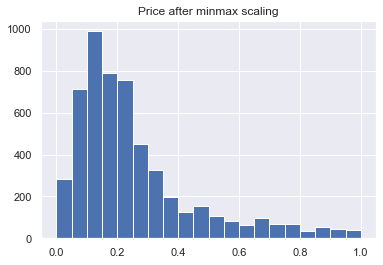

In [62]:
CARS1['Price'].hist(bins=20) #Shows the histogram prior to scaling for reference.
plt.title('Price before minmax scaling')
plt.show()

scaler = MinMaxScaler()
CARS1['Price'] = scaler.fit_transform(CARS1[['Price']]) #Applies the scalingdirectly to the column.

CARS1['Price'].hist(bins=20)
plt.title('Price after minmax scaling') #Shows the histogram after scaling. 
plt.show()

In [63]:
CARS1.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price,Name_Audi,Name_BMW,Name_Chevrolet,...,Location_Mumbai,Location_Pune,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,,
0,2010,0.415607,26.60,998.0,58.0,5.0,0.053360,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,2015,0.236239,19.67,1582.0,126.0,5.0,0.491242,0,0,0,...,0,1,1,1,0,0,0,0,0,0
2,2011,0.265170,18.20,1199.0,88.0,5.0,0.165377,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,2012,0.502398,20.77,1248.0,88.0,7.0,0.226477,0,0,0,...,0,0,1,1,0,0,0,0,0,0
4,2013,0.234330,15.20,1968.0,140.0,5.0,0.704684,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [64]:
CARS1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5447 entries, 0 to 6018
Data columns (total 53 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year                       5447 non-null   int64  
 1   Kilometers_Driven          5447 non-null   float64
 2   Mileage                    5447 non-null   float64
 3   Engine                     5447 non-null   float64
 4   Power                      5447 non-null   float64
 5   Seats                      5447 non-null   float64
 6   Price                      5447 non-null   float64
 7   Name_Audi                  5447 non-null   uint8  
 8   Name_BMW                   5447 non-null   uint8  
 9   Name_Chevrolet             5447 non-null   uint8  
 10  Name_Datsun                5447 non-null   uint8  
 11  Name_Fiat                  5447 non-null   uint8  
 12  Name_Force                 5447 non-null   uint8  
 13  Name_Ford                  5447 non-null   uint8

## Checking again for NaN:

In [65]:
CARS1.isnull().values.sum()

0

# Model building/Linear regression

## Define x and y variables for model:

In [66]:
X = CARS1.drop(['Price'], axis=1) #Remove Price from our X variable since it will be used for our Y variable
y = CARS1[['Price']]

print(X.head())
print(y.head())

       Year  Kilometers_Driven  Mileage  Engine  Power  Seats  Name_Audi  \
S.No.                                                                      
0      2010           0.415607    26.60   998.0   58.0    5.0          0   
1      2015           0.236239    19.67  1582.0  126.0    5.0          0   
2      2011           0.265170    18.20  1199.0   88.0    5.0          0   
3      2012           0.502398    20.77  1248.0   88.0    7.0          0   
4      2013           0.234330    15.20  1968.0  140.0    5.0          1   

       Name_BMW  Name_Chevrolet  Name_Datsun  ...  Location_Mumbai  \
S.No.                                         ...                    
0             0               0            0  ...                1   
1             0               0            0  ...                0   
2             0               0            0  ...                0   
3             0               0            0  ...                0   
4             0               0            0  .

In [67]:
print(X.shape)
print(y.shape)

(5447, 52)
(5447, 1)


## Split data into train/test:

In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #70% of data used for our train portion

In [69]:
X_train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Name_Audi,Name_BMW,Name_Chevrolet,Name_Datsun,...,Location_Mumbai,Location_Pune,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,,
2441,2011,0.242708,18.30,1197.0,112.448714,5.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2381,2017,0.143662,28.09,1248.0,88.000000,5.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
1867,2016,0.321294,26.00,1498.0,98.000000,5.0,0,0,0,0,...,0,0,1,1,0,0,0,0,0,0
2849,2015,0.132090,16.80,796.0,34.000000,5.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1886,2018,0.053596,18.90,1197.0,81.000000,5.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [70]:
y_train.head()

,Price
S.No.,
2441,0.071283
2381,0.320163
1867,0.288391
2849,0.043177
1886,0.216293


## Model using sklearn, train and evaluate: 

In [71]:
from sklearn.linear_model import LinearRegression
linearregression = LinearRegression(normalize=True)                                    
linearregression.fit(X_train, y_train)                                  

print("Intercept of the linear equation:", linearregression.intercept_) 
print("\nCOefficients of the equation are:", linearregression.coef_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

pred = linearregression.predict(X_test)   

Intercept of the linear equation: [-47.20651906]

COefficients of the equation are: [[ 2.35720314e-02 -8.94659349e-02 -6.46230425e-03  8.52685792e-06
   1.66746203e-03  1.75542628e-02  1.59767336e-01  7.38751175e-02
  -1.50230636e-01 -1.85303219e-01 -1.69079880e-01 -1.43733823e-01
  -1.23330963e-01 -1.14137635e-01 -1.07594009e-01  3.08777087e-03
   1.01030295e-14  1.52485969e-01  1.37084082e-01  2.49884631e-01
  -1.56606653e-01 -9.74521624e-02  1.04097666e-01  4.35862348e-01
  -4.40985868e-02 -1.31878383e-01 -8.70480535e-01 -1.29174023e-01
  -1.01881780e-01  5.55111512e-17 -1.77845673e-01 -6.48505505e-03
  -1.31762067e-01  7.99403304e-02  3.44571118e-02  3.42589559e-03
   3.12487517e-02 -2.48912538e-02  2.43879703e-02  3.14729471e-03
  -1.19414184e-03 -5.74730466e-02 -1.84334659e-02 -4.05077460e-03
  -4.27173902e-02  4.21109409e-02  3.37682662e-01 -3.80402704e-03
  -3.61700523e-02 -3.05660745e-02 -1.58976834e-02 -8.79954780e-03]]


## Model performance: 

In [72]:
mean_absolute_error(y_test, pred) # Mean Absolute Error performed on test

0.05883965865103254

The Mean Absolute Error test gives us the absolute value of the difference between the predicted value and the actual value. It tell us how big of an error we can expect from our predicted value.

In [73]:
mean_squared_error(y_test, pred)**0.5 #RMSE performed on test data

0.0848978310642395

RMSE measures the differences between values predicted by a model compared to values observed. It squares the differences as opposed to taking the absolute value as seen in the Mean Absolute Error.

In [74]:
r2_score(y_test, pred) #R2 Squared performed on test

0.8256987454370991

1. R^2 model test determines the amount of difference in the dependent value that can be explained by the independent value. Essentially how well the model fit the regression model.
2. The R^2 score of .83 means that for this model independent variables can explain 83% of variances in the dependent variables. A score close to 80% indicates a satisfactory model. When a score gets closer to 100%, that is not always ideal as it may suggest there may be something wrong.
3. When dealing with categorical data, lower R^2 are more common than when you are dealing with simply numeric data.

## Model using statsmodel: 

In [75]:
#Build linear regression model:
import statsmodels.api as sm
X = sm.add_constant(X)
X_train1, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

olsmod0 = sm.OLS(y_train, X_train1)
olsres0 = olsmod0.fit()
print(olsres0.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     399.2
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:41:18   Log-Likelihood:                 4190.3
No. Observations:                3812   AIC:                            -8279.
Df Residuals:                    3761   BIC:                            -7960.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

OBSERVATIONS:
1. The P value for each variable will show if it is important. Since we are using a significance value of .05, any P value we observe under that means that variable is significant.  
2. Observations using coefficient: A negative coefficient means that price will decrease with their increase. A positive coefficient means that price will increase with their decrease.
3. We should check for Multicollinearity before really looking at P values.
4. The R-squared and adjusted R squared are quite similiar.
5. The constant coeff is the y-intercept.
6. The standard error on several columns are quite high which is troubling since the lower the number the better the accuracy.

## Check linear regression assumptions: 

1. No Multicollinearity
2. Mean of residuals should be 0
3. No Heteroscedacity
4. Linearity of variables
5. Normality of error terms

## Test for Multicollinearity:

In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

const                        792361.006128
Year                              2.082665
Kilometers_Driven                 1.870756
Mileage                           4.019343
Engine                            9.037031
Power                             6.292883
Seats                             2.722486
Name_Audi                       133.373156
Name_BMW                        155.009091
Name_Chevrolet                  120.151777
Name_Datsun                      14.225917
Name_Fiat                        29.296730
Name_Force                        4.059550
Name_Ford                       265.947743
Name_Honda                      548.582276
Name_Hyundai                    895.688943
Name_ISUZU                        3.036116
Name_Isuzu                        2.026949
Name_Jaguar                       8.208403
Name_Jeep                        16.282219
Name_Land                        19.255631
Name_Mahindra                   259.462784
Name_Maruti        

## 1. Remove Multicollinearity:

To remove multicollinearity:

1. Drop every column one by one, that has VIF score greater than 5.
2. Look at the adjusted R square of all these models
3. Drop the Variable that makes least change in Adjusted-R square
4. Check the VIF Scores again
5. Continue till you get all VIF scores under 5

In [77]:
X_train2 = X_train1.drop('Name_Maruti', axis=1) #Dropping Name_Maruti
vif_series2 = pd.Series([variance_inflation_factor(X_train2.values,i) for i in range(X_train2.shape[1])],index=X_train2.columns)
print('Series after feature selection: \n\n{}\n'.format(vif_series2))

Series after feature selection: 

const                        803235.219879
Year                              2.144680
Kilometers_Driven                 1.856188
Mileage                           4.034183
Engine                            9.527111
Power                             6.615346
Seats                             2.793733
Name_Audi                         1.621174
Name_BMW                          1.827184
Name_Chevrolet                    1.112517
Name_Datsun                       1.017407
Name_Fiat                         1.029414
Name_Force                        1.016052
Name_Ford                         1.329585
Name_Honda                        1.622225
Name_Hyundai                      1.747441
Name_ISUZU                        1.015577
Name_Isuzu                             NaN
Name_Jaguar                       1.114119
Name_Jeep                         1.051542
Name_Land                         1.103408
Name_Mahindra                     1.910408
Name_Mercedes-Benz  

In [78]:
olsmod1 = sm.OLS(y_train, X_train2) #Check our R squared and P values after removing column.
olsres1 = olsmod1.fit()
print(olsres1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     407.2
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:41:20   Log-Likelihood:                 4189.6
No. Observations:                3812   AIC:                            -8279.
Df Residuals:                    3762   BIC:                            -7967.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [79]:
X_train3 = X_train2.drop('Engine', axis=1) #Dropping Engine
vif_series3 = pd.Series([variance_inflation_factor(X_train3.values,i) for i in range(X_train3.shape[1])],index=X_train3.columns)
print('Series after feature selection: \n\n{}\n'.format(vif_series3))

Series after feature selection: 

const                        801959.044037
Year                              2.142212
Kilometers_Driven                 1.852762
Mileage                           3.538285
Power                             3.558745
Seats                             2.587030
Name_Audi                         1.620942
Name_BMW                          1.822439
Name_Chevrolet                    1.112371
Name_Datsun                       1.017081
Name_Fiat                         1.028662
Name_Force                        1.015776
Name_Ford                         1.308751
Name_Honda                        1.595335
Name_Hyundai                      1.747284
Name_ISUZU                        1.012480
Name_Isuzu                             NaN
Name_Jaguar                       1.113524
Name_Jeep                         1.049760
Name_Land                         1.102374
Name_Mahindra                     1.870230
Name_Mercedes-Benz                1.760335
Name_Mini           

In [80]:
olsmod2 = sm.OLS(y_train, X_train3) #Check our R squared and P values after removing column.
olsres2 = olsmod2.fit()
print(olsres2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     415.7
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:41:21   Log-Likelihood:                 4189.0
No. Observations:                3812   AIC:                            -8280.
Df Residuals:                    3763   BIC:                            -7974.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

1. After dropping the columns Name_Maruti and Engine, all of the VIF values are below 5. 
2. Our R squared value is at 84%.
3. We will go with OLSmodel2.
4. Next, we will begin to drop columns with P values greater than .05. We will check the other P values as we go.

### Drop column Location_Kochi:

In [81]:
X_train4 = X_train3.drop(['Location_Kochi'], axis=1)

In [82]:
olsmod3 = sm.OLS(y_train, X_train4)
olsres3 = olsmod3.fit()
print(olsres3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     424.6
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:41:21   Log-Likelihood:                 4189.0
No. Observations:                3812   AIC:                            -8282.
Df Residuals:                    3764   BIC:                            -7982.
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Drop column Fuel_Type_LPG:

In [83]:
X_train5 = X_train4.drop(['Fuel_Type_LPG'], axis=1)

In [84]:
olsmod4 = sm.OLS(y_train, X_train5)
olsres4 = olsmod4.fit()
print(olsres4.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     434.0
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:41:21   Log-Likelihood:                 4188.9
No. Observations:                3812   AIC:                            -8284.
Df Residuals:                    3765   BIC:                            -7990.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Drop column Name_Skoda: 

In [85]:
X_train6 = X_train5.drop(['Name_Skoda'], axis=1)

In [86]:
olsmod5 = sm.OLS(y_train, X_train6)
olsres5 = olsmod5.fit()
print(olsres5.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     443.7
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:41:21   Log-Likelihood:                 4188.9
No. Observations:                3812   AIC:                            -8286.
Df Residuals:                    3766   BIC:                            -7998.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Drop column Name_Smart: 

In [87]:
X_train7 = X_train6.drop(['Name_Smart'], axis=1)

In [88]:
olsmod6 = sm.OLS(y_train, X_train7)
olsres6 = olsmod6.fit()
print(olsres6.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     443.7
Date:                Sat, 17 Apr 2021   Prob (F-statistic):               0.00
Time:                        21:41:21   Log-Likelihood:                 4188.9
No. Observations:                3812   AIC:                            -8286.
Df Residuals:                    3766   BIC:                            -7998.
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

##  2. Check the mean of residuals:

In [89]:
residual= olsres6.resid
np.mean(residual)

-3.0906816397296633e-14

Our mean in not near zero but below it. This suggests numerical errors in our model.

## 3. Test for Linearity: 

In [90]:
residual=olsres6.resid
fitted=olsres6.fittedvalues #predicted values

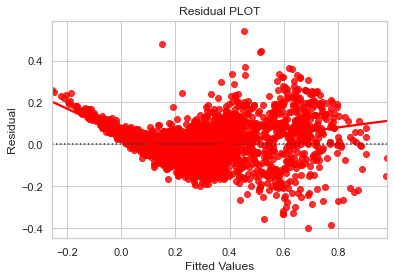

In [91]:
sns.set_style("whitegrid")
sns.residplot(fitted,residual,color="red",lowess=True)
plt.xlabel("Fitted Values")
plt.ylabel("Residual")
plt.title("Residual PLOT")
plt.show()

There does not appear to be a pattern present.  

## 4.  Test for normality: 

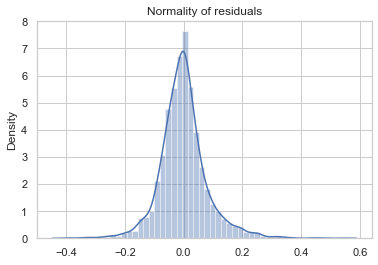

In [92]:
sns.distplot(residual)
plt.title('Normality of residuals')
plt.show()

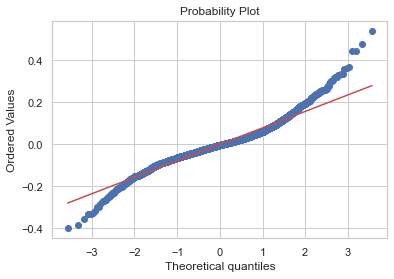

In [93]:
import pylab
import scipy.stats as stats
stats.probplot(residual,dist="norm",plot=pylab)
plt.show()

There appears to be a close to normal distribution of the residuals.

## 5. Test for Heteroscedasticity: 

Null hypothesis: Residuals are homoscedastic.
Alternate hypothesis: Residuals have hetroscedasticity.

In [94]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residual, X_train7)
lzip(name, test)

[('F statistic', 0.8432977833771589), ('p-value', 0.9998806265746774)]

Since p-value > 0.05 we cannot reject the Null Hypothesis that the residuals are homoscedastic.

## Predicting on the test data: 

In [95]:
X_train7.columns

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Power', 'Seats',
       'Name_Audi', 'Name_BMW', 'Name_Chevrolet', 'Name_Datsun', 'Name_Fiat',
       'Name_Force', 'Name_Ford', 'Name_Honda', 'Name_Hyundai', 'Name_ISUZU',
       'Name_Isuzu', 'Name_Jaguar', 'Name_Jeep', 'Name_Land', 'Name_Mahindra',
       'Name_Mercedes-Benz', 'Name_Mini', 'Name_Mitsubishi', 'Name_Nissan',
       'Name_Porsche', 'Name_Renault', 'Name_Tata', 'Name_Toyota',
       'Name_Volkswagen', 'Name_Volvo', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kolkata',
       'Location_Mumbai', 'Location_Pune', 'Transmission_Manual',
       'Fuel_Type_Diesel', 'Fuel_Type_Electric', 'Fuel_Type_Petrol',
       'Owner_Type_Fourth & Above', 'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [96]:
X_test_final = X_test[X_train7.columns] 

In [97]:
X_test.columns

Index(['const', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'Name_Audi', 'Name_BMW', 'Name_Chevrolet', 'Name_Datsun',
       'Name_Fiat', 'Name_Force', 'Name_Ford', 'Name_Honda', 'Name_Hyundai',
       'Name_ISUZU', 'Name_Isuzu', 'Name_Jaguar', 'Name_Jeep', 'Name_Land',
       'Name_Mahindra', 'Name_Maruti', 'Name_Mercedes-Benz', 'Name_Mini',
       'Name_Mitsubishi', 'Name_Nissan', 'Name_Porsche', 'Name_Renault',
       'Name_Skoda', 'Name_Smart', 'Name_Tata', 'Name_Toyota',
       'Name_Volkswagen', 'Name_Volvo', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Transmission_Manual', 'Fuel_Type_Diesel', 'Fuel_Type_Electric',
       'Fuel_Type_LPG', 'Fuel_Type_Petrol', 'Owner_Type_Fourth & Above',
       'Owner_Type_Second', 'Owner_Type_Third'],
      dtype='object')

In [98]:
X_test_final.head()

,const,Year,Kilometers_Driven,Mileage,Power,Seats,Name_Audi,Name_BMW,Name_Chevrolet,Name_Datsun,...,Location_Kolkata,Location_Mumbai,Location_Pune,Transmission_Manual,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_Petrol,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
S.No.,,,,,,,,,,,,,,,,,,,,,
2080,1.0,2014,0.409821,19.08,126.0,5.0,0,0,0,0,...,0,1,0,0,1,0,0,0,1,0
5204,1.0,2011,0.325923,20.00,68.0,5.0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
3900,1.0,2012,0.161032,16.02,93.0,7.0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1193,1.0,2012,0.210445,20.00,68.0,5.0,0,0,0,0,...,1,0,0,1,1,0,0,0,0,0
4794,1.0,2018,0.062657,24.30,88.0,5.0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


## Check the performance on train & test: 

In [101]:
#Checking root mean squared error on both train and test set  

from sklearn.metrics import mean_squared_error
rms = np.sqrt(mean_squared_error(y_train, fitted))
print('Train error:',rms)

rms1 = np.sqrt(mean_squared_error(y_test, pred))
print('Test error:',rms1)

Train error: 0.0806365506059506
Test error: 0.0848978310642395


We have a low train and test error rate. The rates are similiar so we can rule out overfitting. 

## Observations: 

1. With this model, we will be able to predict the pricing on a used car 84% of the time.
2. The variables that have the greatest significance with regard to price are: a. the year the car was manufactured b. the number of seats c. the power of the engine d. Mileage

## Business Insights: 

1. Using this model, we can predict the price of a used car correctly 82% of the time. 
2. There does seem to be a higher inventory and/or demand for one previous owner, diesel, manual cars. 
3. I would suggest further analysis and cost comparison of locations vs. the price of the cars being sold there. There could be growth potential in these areas. 
4. We would also want to consider if it would be cost effective to open used car lots in these locations if we have not already. 